# Using Log Plotter

---

Cells below are the example of using `plotter` function to generate plots for selected logs.



In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import LabelEncoder


def discrete_cmap(N, base_cmap=None):
  """Extract discrete colors from cmap"""
  base = plt.cm.get_cmap(base_cmap)
  color_list = base(np.linspace(0, 1, N))
  cmap_name = base.name + str(N)
  return base.from_list(cmap_name, color_list, N)
  

def plotter(data, depth_col, num_col=None, cat_col=None, cat_classes=None):
  """
  Plot log data.
  
  Parameters
  ----------
    data : pandas dataframe
      Well log data in pandas dataframe. Depth column is required.
    depth_col : single value integer in list
      Column index of depth in data.
    num_col : single or multiple integers in list
      Numeric log indices in data. Eg, GR, Resistivity, etc. Skip if do not
      intend to plot numeric data.
    cat_col : single or multiple integers in list
      Categorical log indices in data. Eg, Facies, Formation, etc. Skip if do not
      intend to plot numeric data.
    cat_classes : list of strings/discrete entity in list
      List of all classes according to cat_col order. Eg, if cat_col = [0, 1]
      referring to Facies and Formation respectively, where both have 2 and 3
      classes respectively:
        >> cat_classes = [['SS','SH'], ['Seligi','Raya','Serudon']]
        
  Return
  ------
    No return. Only will prompt matplotlib.pyplot graph object.
  """
  
  # set up plt chart
  C = len(num_col) + len(cat_col)
  fig, ax = plt.subplots(nrows=1, ncols=C, figsize=(10, 20))
  
  # depth
  depth_header = data.columns[depth_col].tolist()
  data = data.sort_values(by=depth_header)
  depth_data = data[depth_header].values
  depth_trim = max(depth_data), min(depth_data)
  
  # numeric data
  if not num_col is None:
    num_header = data.iloc[:, num_col].columns.tolist()
    num_data = data.iloc[:, num_col].values
    for i in range(len(num_col)):
      ax[i].plot(num_data[:, i], depth_data)
      ax[i].set_xlabel(num_header[i])
      ax[i].invert_yaxis()
      ax[i].set_ylim(depth_trim)
      
  # categorical data
  if not cat_col is None:
    cat_header = data.iloc[:, cat_col].columns.tolist()
    cat_data = data.iloc[:, cat_col].values
    for i in range(len(cat_col)):
      j = i + len(num_col)
      x = cat_data[:, i]
      le = LabelEncoder()
      le.fit(cat_classes[i])
      class_encoded = le.transform(cat_classes[i])
      x_encoded = le.transform(x)
      n_unq = len(np.unique(x))
      raster_array = np.repeat(np.expand_dims(x_encoded, 1), 100, 1).astype(float)
      cm_val = discrete_cmap(N=len(cat_classes[i]), base_cmap='hsv')
      cm_vmin, cm_vmax = min(class_encoded), max(class_encoded)
      im = ax[j].imshow(X=raster_array, interpolation=None, aspect='auto', cmap=cm_val, vmin=cm_vmin, vmax=cm_vmax)
      divider = make_axes_locatable(ax[j])
      cax = divider.append_axes('right', size='20%', pad=0.05)
      cbar = plt.colorbar(im, cax=cax)
      cbar.ax.get_yaxis().set_ticks([])
      ax[j].set_xticklabels([])
      ax[j].set_xlabel(cat_header[i])
      ax[j].grid()
      
      # future fix to have class labels at the side of colorbar
      #cbar.ax.text(0, 20, 'lol')
      #for k, lab in enumerate([str(s) for s in np.unique(cat[:, i])]):
      #    cbar.ax.text(0, (2 * k + 1) / 10, lab, ha='left', va='center')
      #cbar.ax.get_yaxis().labelpad = 15
      #cbar.ax.set_ylabel('# of contacts', rotation=90)
      #cbar.ax.set_yticklabels(np.unique(cat[:, i]))
      
  # keep only first yaxis
  for i in range(len(num_col)+len(cat_col)-1):
    ax[i+1].set_yticklabels([])
  
  plt.show()

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/seg/2016-ml-contest/master/training_data.csv')

In [17]:
pd.options.display.max_columns=100

In [44]:
data = pd.read_csv('../data/datablob_added_facies.csv',index_col=0)
print(len(data))
data = data[pd.notnull(data['fm'])]


247530


In [45]:
len(data)

242088

In [ ]:
["DENS","DTS","GR","PEF","RESD","RESM","RESS","NEUT","SP"]

In [32]:
data = data[["DENS","DTS","GR","PEF","RESD","RESM","RESS","NEUT","SP"]]
# test[test.tvdss>139].head()

In [37]:
data.facies.unique()

array(['NO FACIES', 'SH', 'SL', 'SS', 'AN', 'LS'], dtype=object)

In [46]:
data["lith"] = data.GR.map(lambda x: "Shale" if x>=120 else "Sand" )

In [47]:
data['well'].unique()

array(['cheal-a10', 'cheal-a11', 'cheal-a12', 'cheal-b8', 'cheal-c3',
       'cheal-c4', 'cheal-g1', 'cheal-g2', 'cheal-g3', 'cheal-a6',
       'cheal-b1', 'cheal-1', 'cheal-2', 'cheal-a4', 'cheal-a3x',
       'cheal-b4', 'cheal-a7'], dtype=object)

In [48]:
data.to_csv("../data/with_lith.csv")

In [26]:
wells = [data[data['well']==name] for name in data['well'].unique()]

Well: ['cheal-a10']


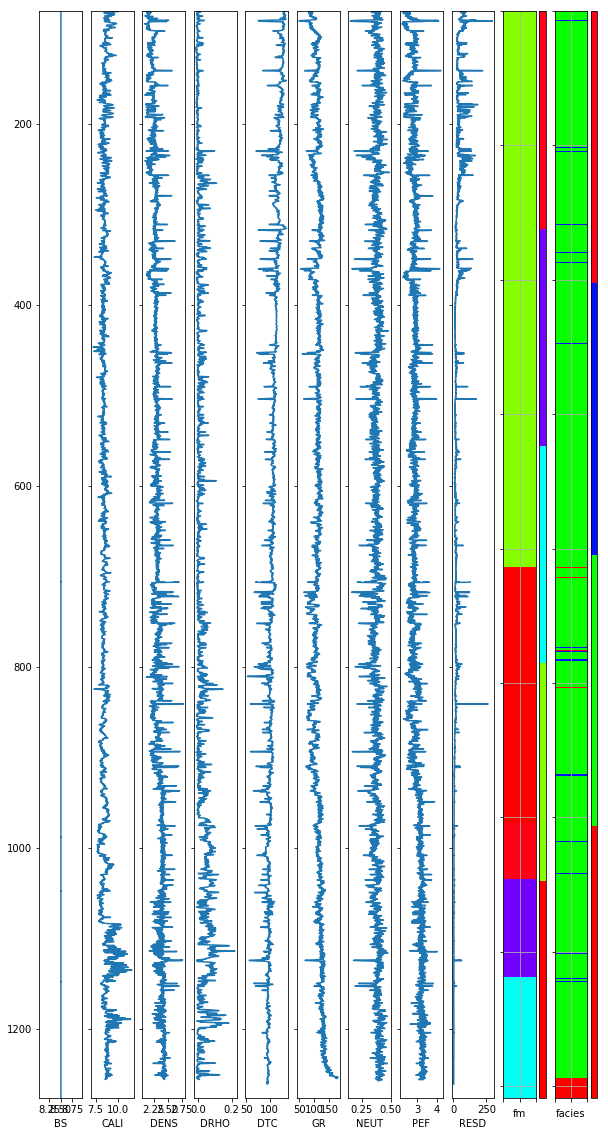

In [27]:
for well in wells:
  print('Well:', well['well'].unique())
  plotter(
    data = well,
    depth_col = [1],
    num_col = [2, 3, 4, 5, 6, 7, 8, 9, 10],
    cat_col = [14, -1],
    cat_classes = [well.iloc[:, 14].unique(), well.iloc[:, -1].unique()]
  )
  break

In [28]:
check_recruitf9 = data[data['Well Name']=='Recruit F9']
print('Formation:', check_recruitf9.Formation.unique())
print('Facies:', check_recruitf9.Facies.unique())

KeyError: 'Well Name'